In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

import plotly
plotly.offline.init_notebook_mode()

# Add parent directory to path to import from vae package
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Import VAEs and utilities
from utils import *
from experiments import *

Using slow nslr


## 1. Load data and preprocess

In [3]:
X_train, X_val, y_train, y_val = open_data(extractor='pupil', keep_nan_padding=True, objective='reg')
num_classes = len(np.unique(y_train))
base = np.min(y_train)  # Check if data is 0-based
if base != 0:
    y_train -= base
y_val -= base

analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 


In [4]:
# Interpolate blinks in the dataset
X_train_interpolated = akima_interpolate_zeros(X_train, pad_value=np.nan)
X_val_interpolated = akima_interpolate_zeros(X_val, pad_value=np.nan)
X_train_interpolated = X_train_interpolated.astype(np.float32)
X_val_interpolated = X_val_interpolated.astype(np.float32)
X_train.shape


(150, 17351, 2)

## 2. Signal

In [5]:
dload = '../model_dir/ablations/signal/'

### 2.1 Raw

Sample 3 Reconstruction MSE: 0.053566


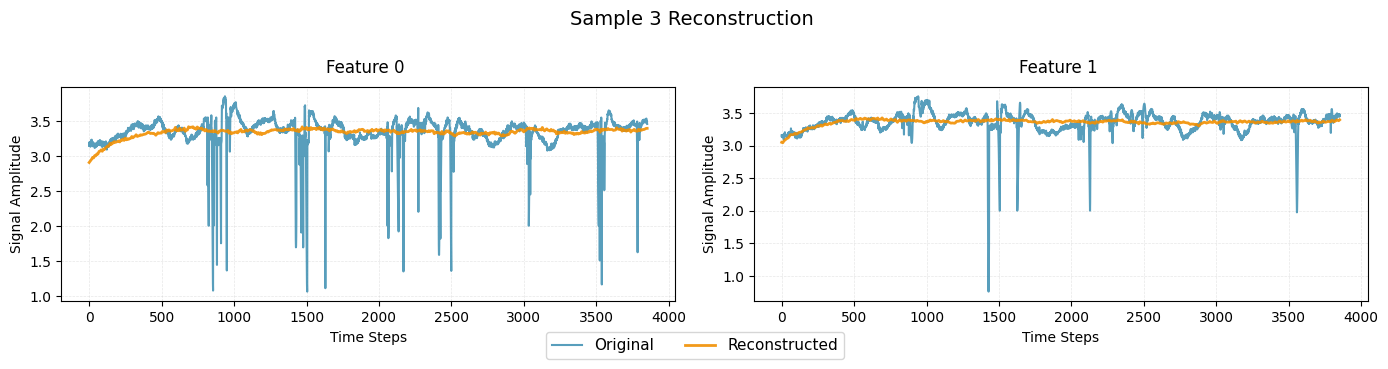

In [6]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_raw_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.057407


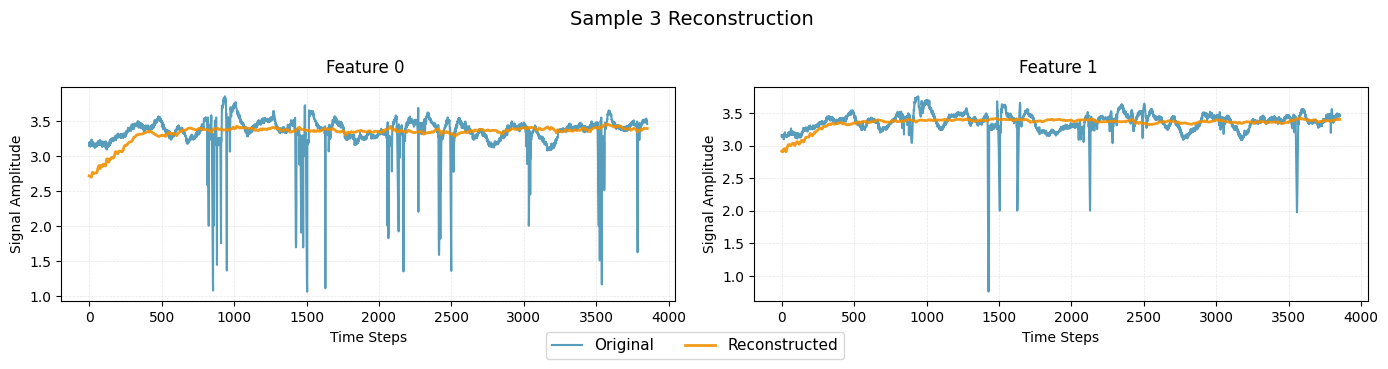

In [7]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_raw_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.054924


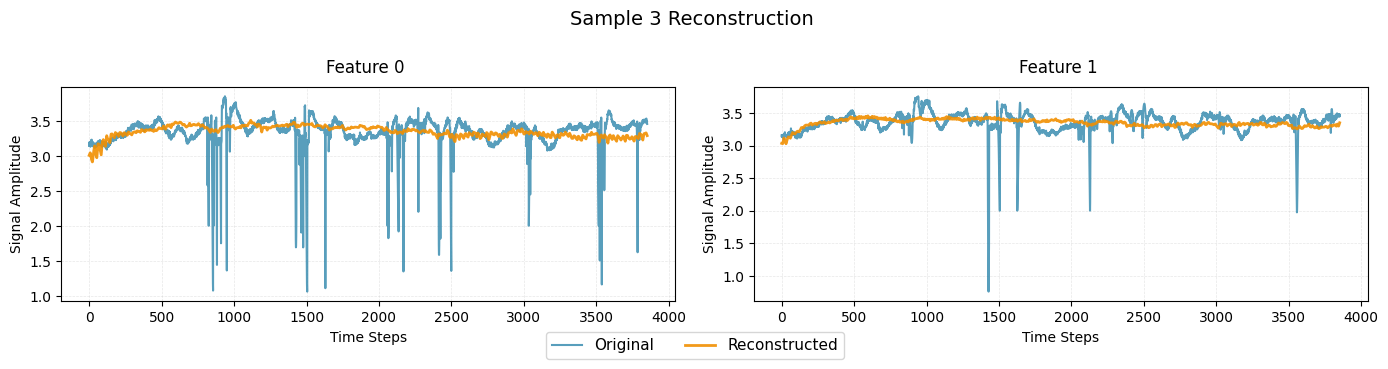

In [8]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_raw_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 2.2 FFT (Linear Resampling)

Sample 3 Reconstruction MSE: 0.056012


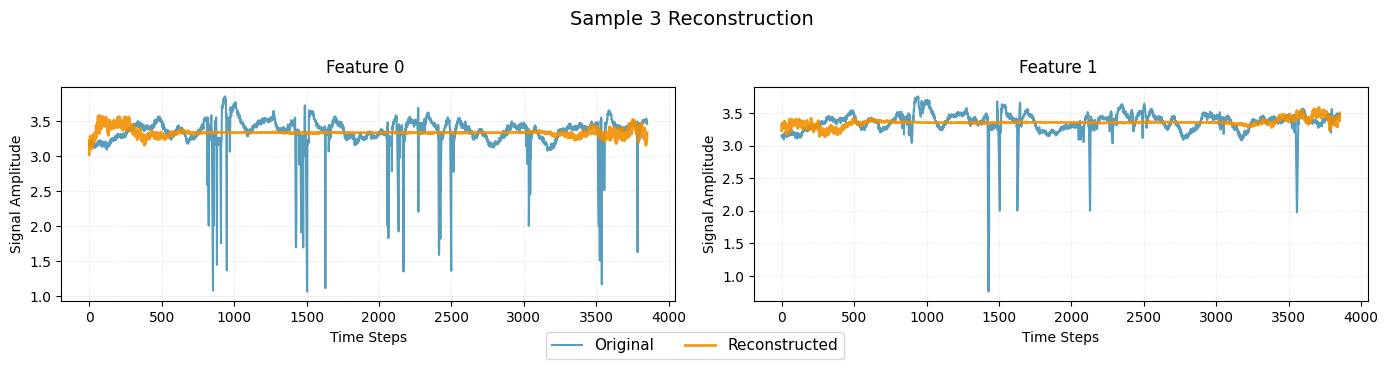

In [9]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.057262


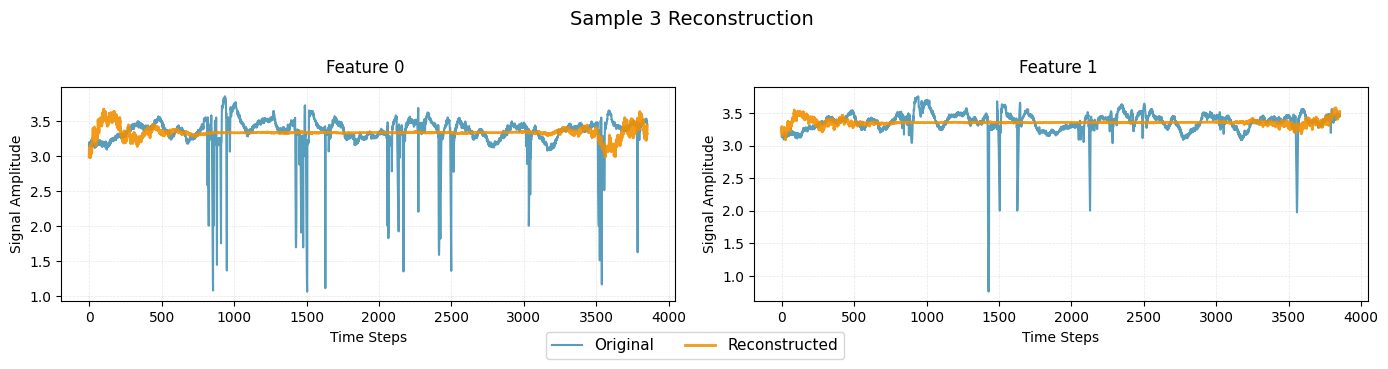

In [10]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.052072


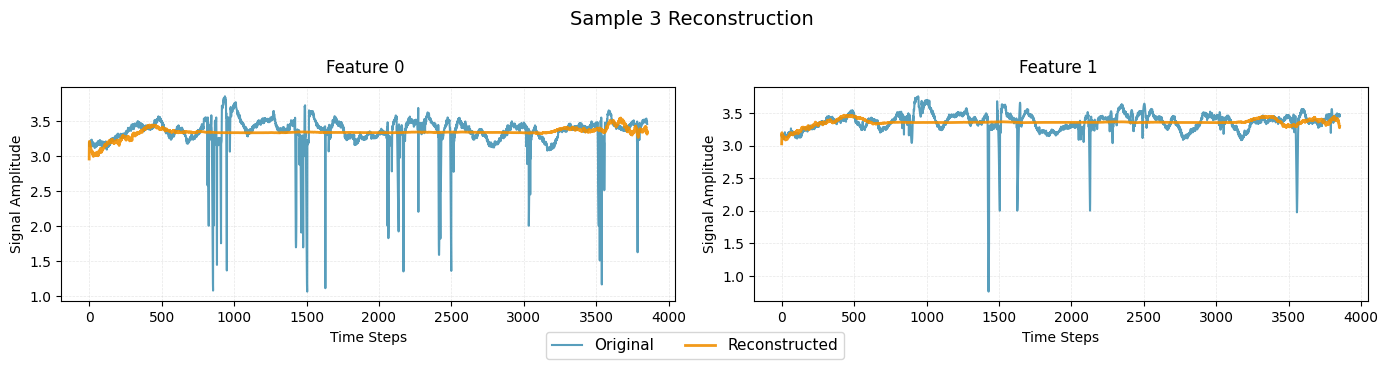

In [11]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 2.3 FFT (Low Pass Filter)

Sample 11 Reconstruction MSE: 0.017234


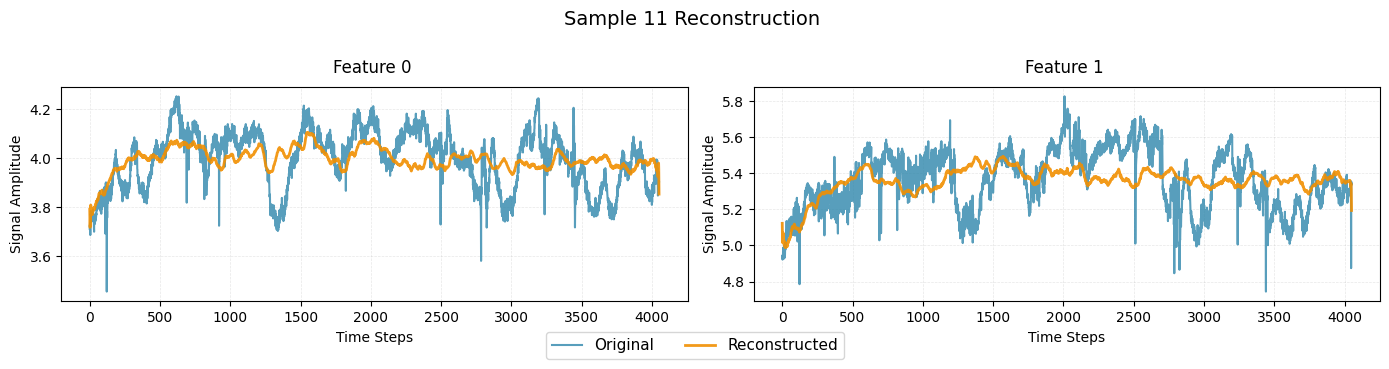

In [12]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft2_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=11
)

Sample 3 Reconstruction MSE: 0.055574


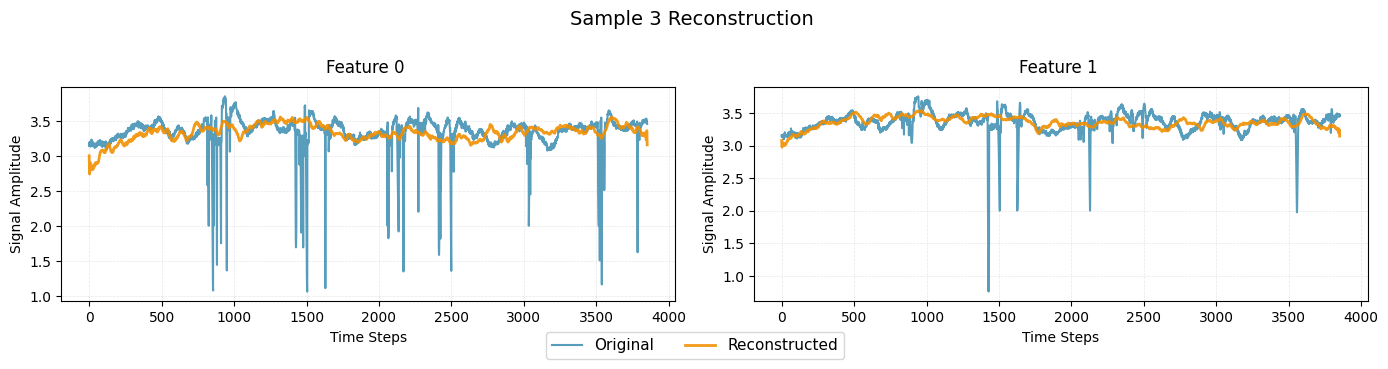

In [13]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft2_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.051827


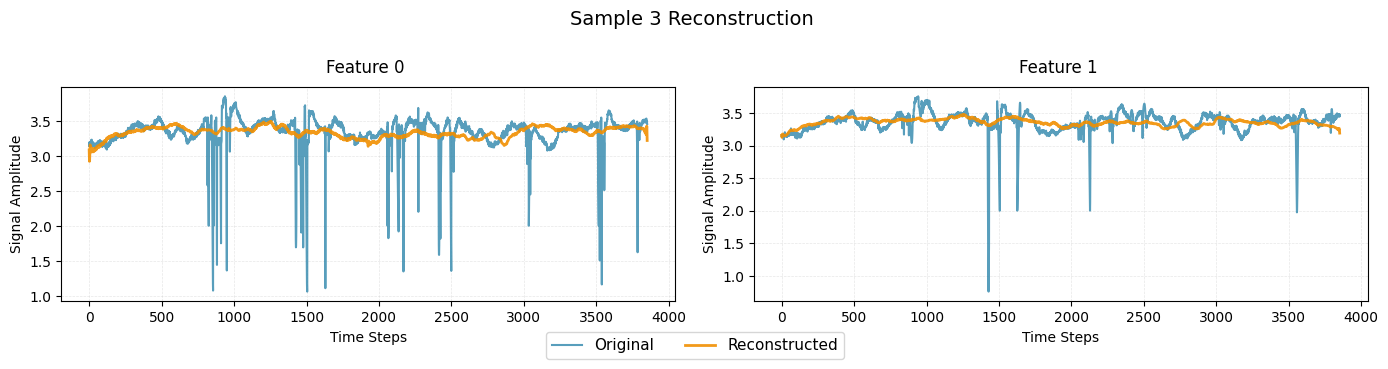

In [14]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_fft2_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

## 3. Wavelet

In [15]:
dload = '../model_dir/ablations/wavelet/'

### 3.1 Symlet

Sample 11 Reconstruction MSE: 0.022763


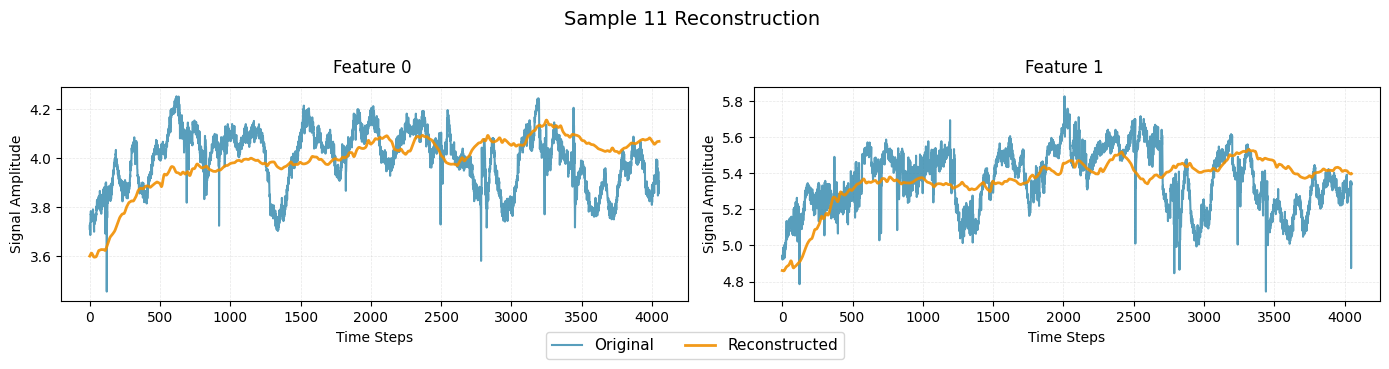

In [16]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_sym16_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=11
)

Sample 3 Reconstruction MSE: 0.062851


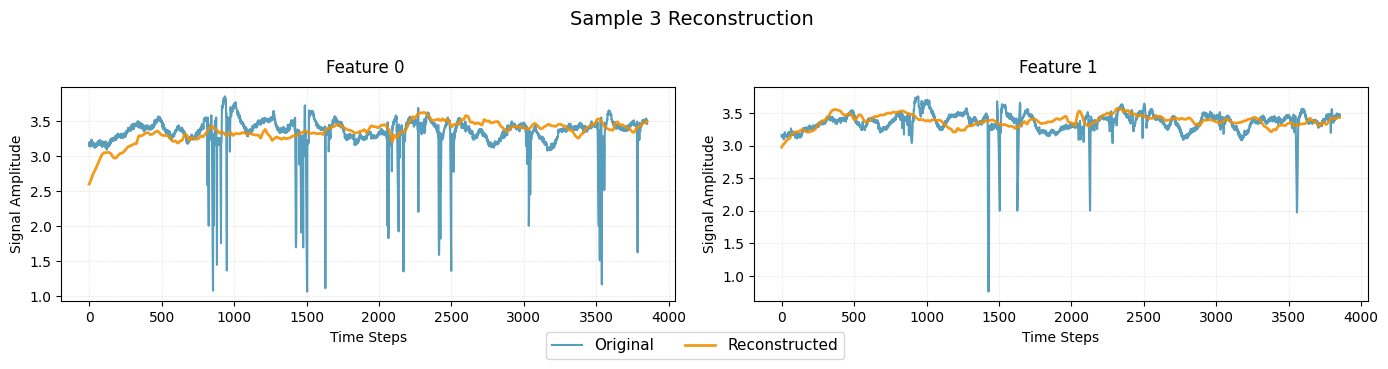

In [17]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_sym16_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.068903


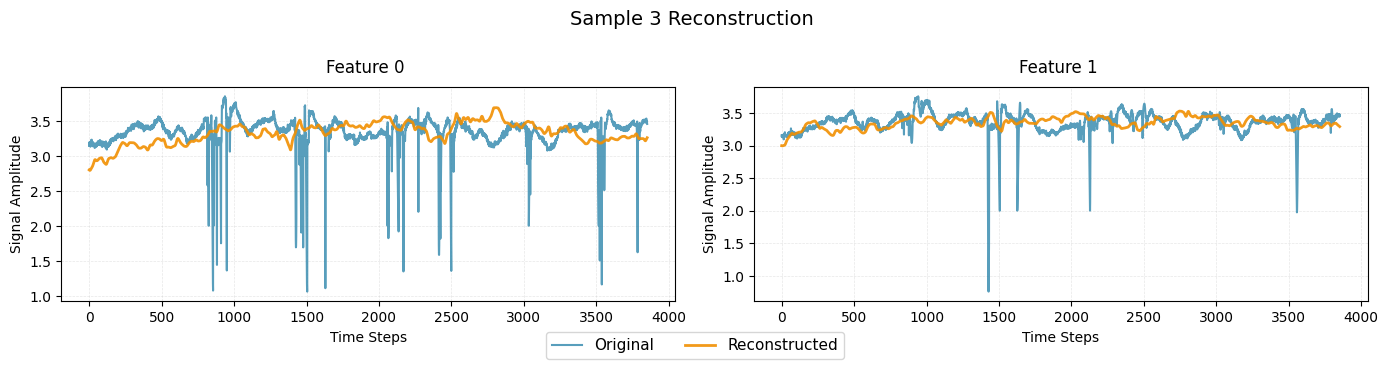

In [18]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_sym16_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 3.2 Debauchies

Sample 3 Reconstruction MSE: 0.071596


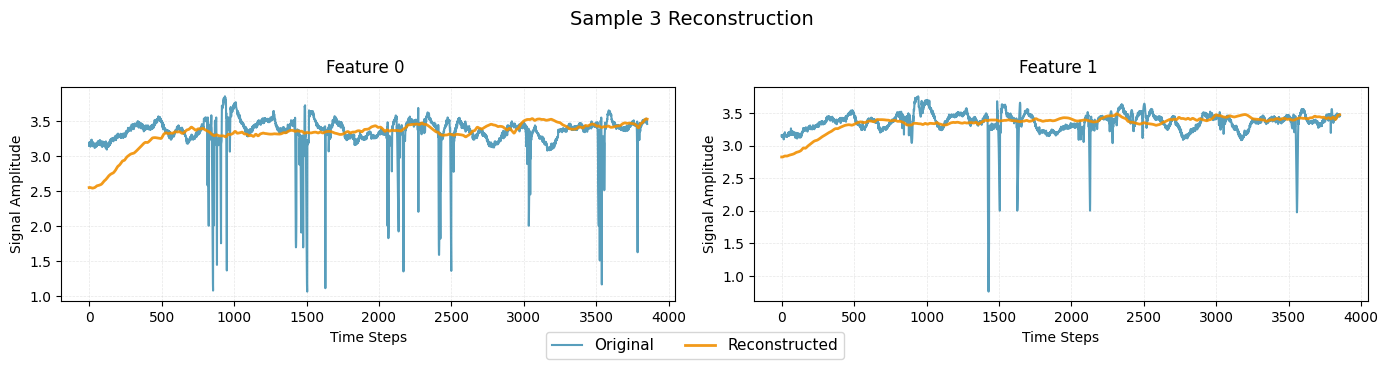

In [19]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_db16_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.087356


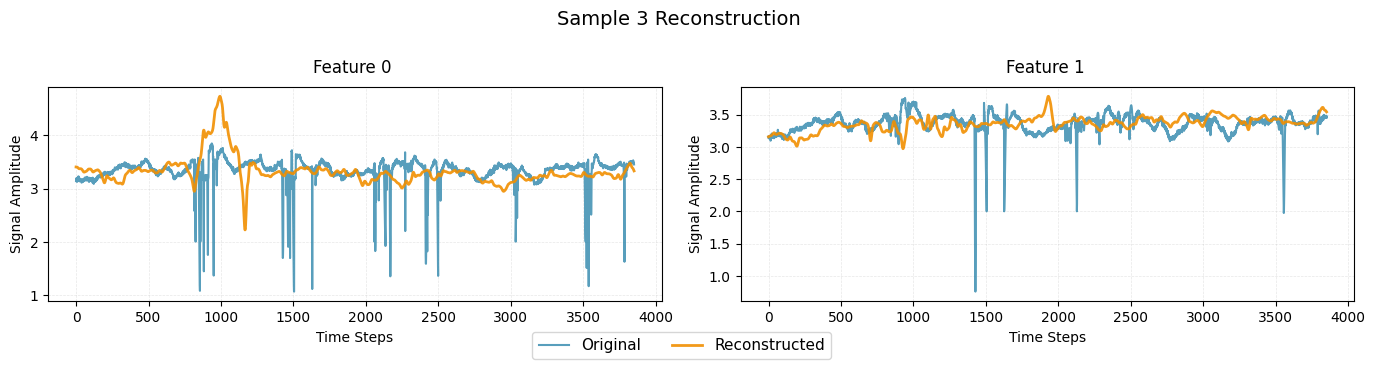

In [20]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_db16_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.073785


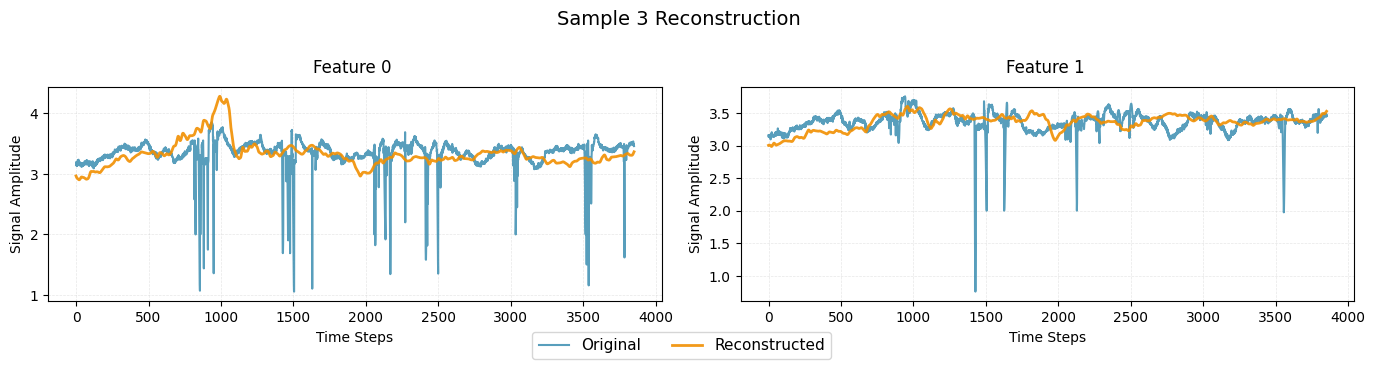

In [21]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_db16_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 3.3 Coiflet

Sample 1 Reconstruction MSE: 0.054400


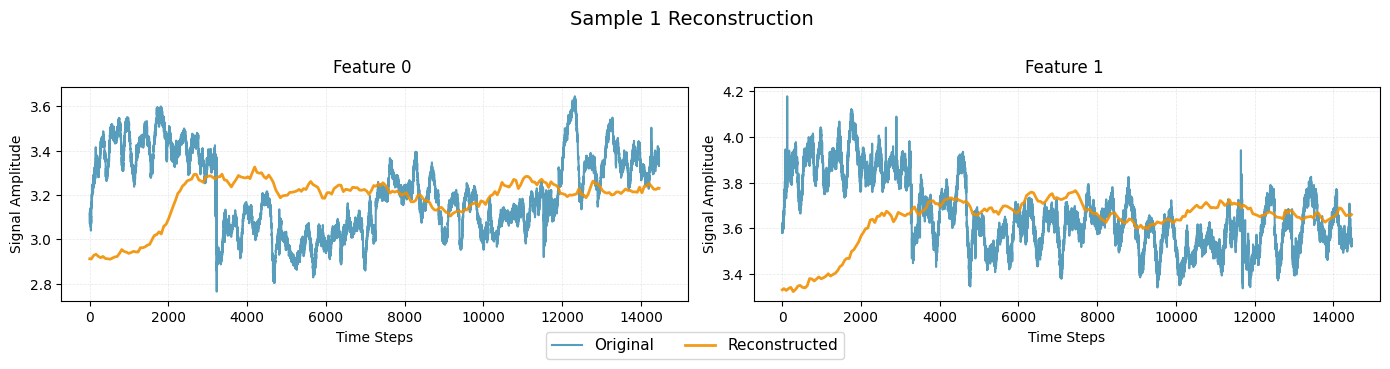

In [22]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coif16_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=1
)

Sample 3 Reconstruction MSE: 0.061493


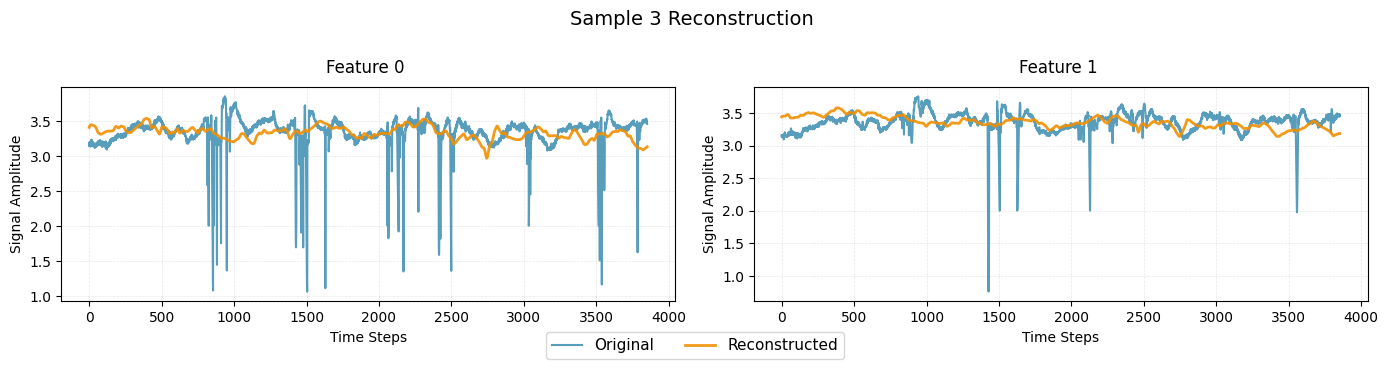

In [23]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coif16_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.068595


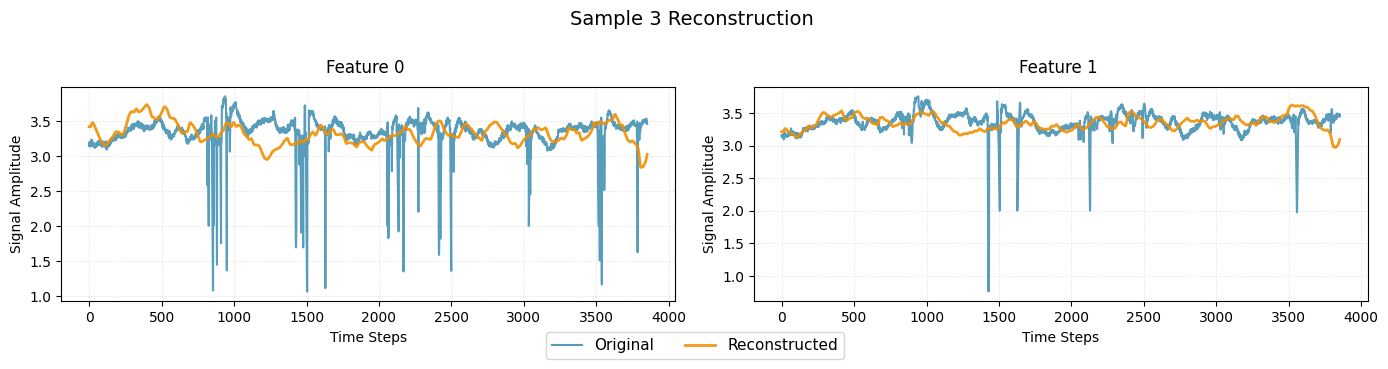

In [24]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coif16_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

## 4. Resampled Coefficients

In [25]:
dload = '../model_dir/ablations/resampling/'

### 4.1 128

Sample 17 Reconstruction MSE: 0.100705


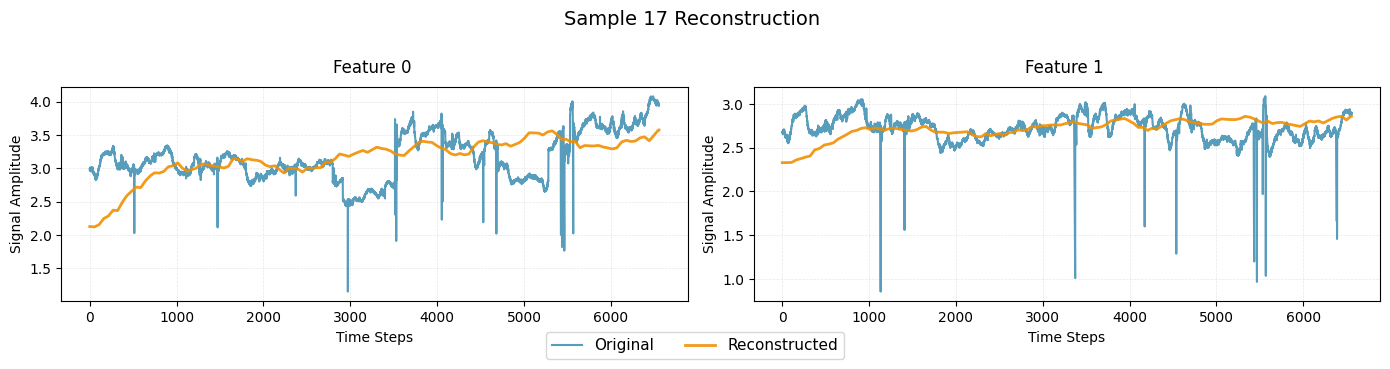

In [26]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff128_none.pt",
    X_data=X_train_interpolated,
    dload=dload,
    sample_idx=17
)

Sample 3 Reconstruction MSE: 0.070481


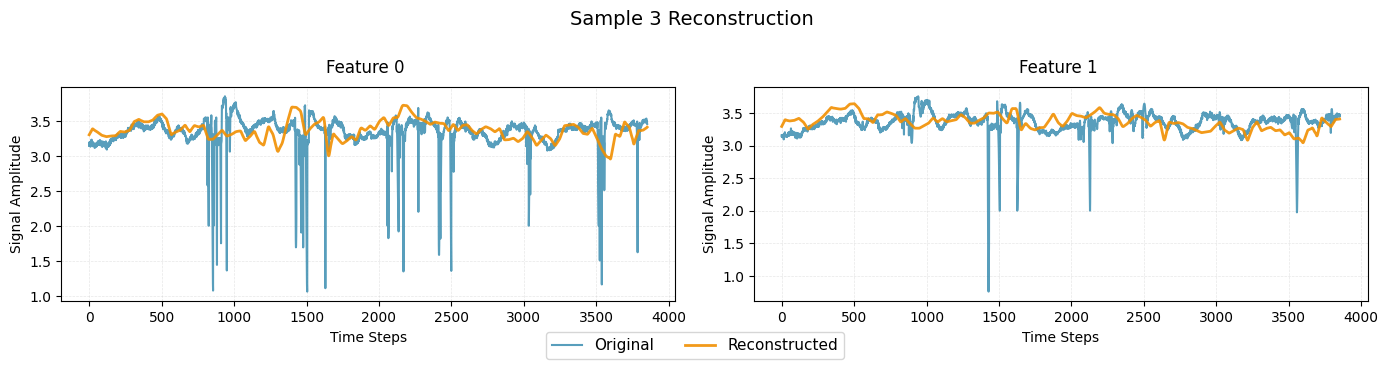

In [27]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff128_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.076839


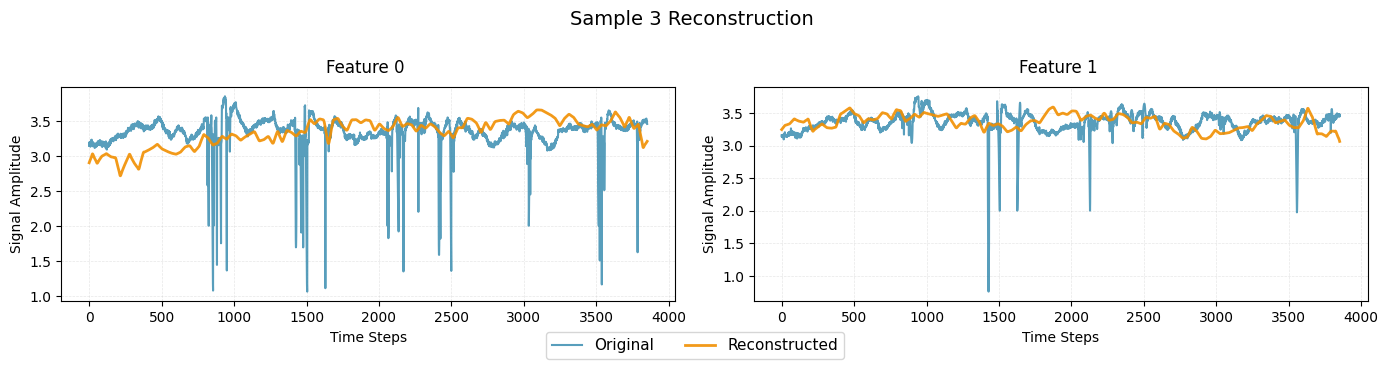

In [28]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff128_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 4.2 256

Sample 3 Reconstruction MSE: 0.054103


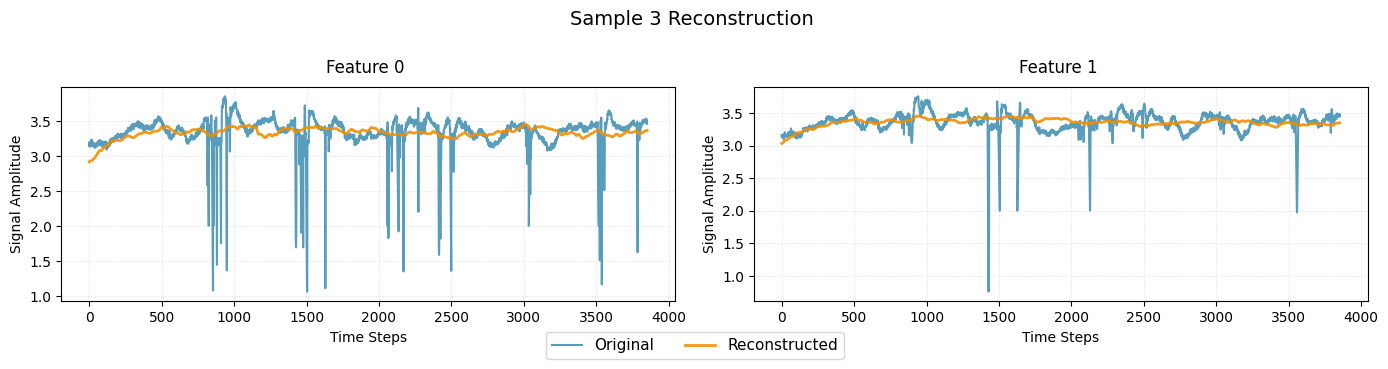

In [29]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff256_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.069619


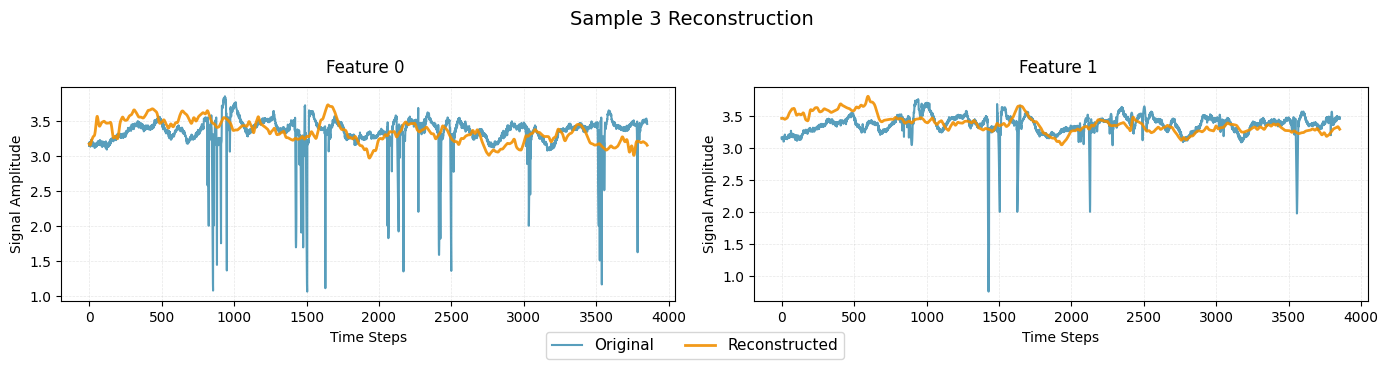

In [30]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff256_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.106811


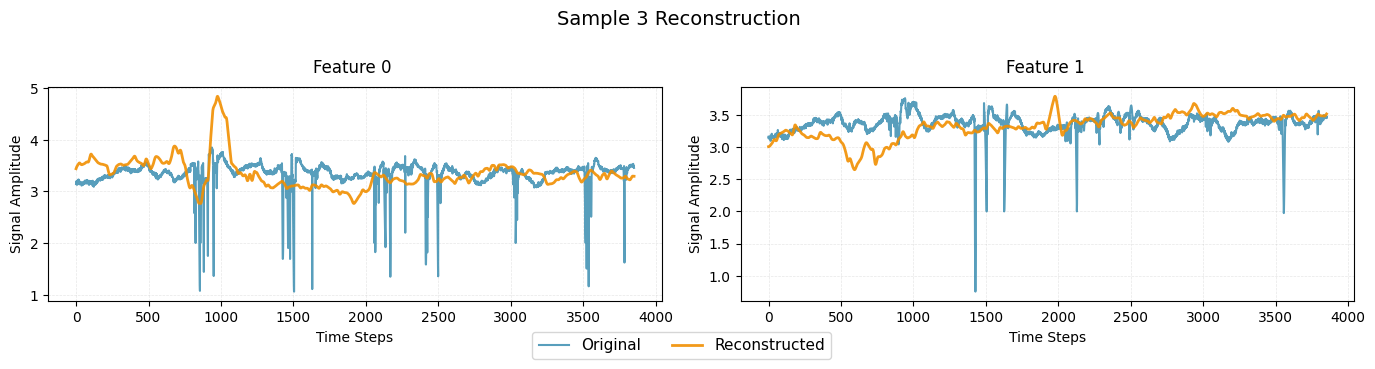

In [31]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff256_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 4.3 512

Sample 3 Reconstruction MSE: 0.054394


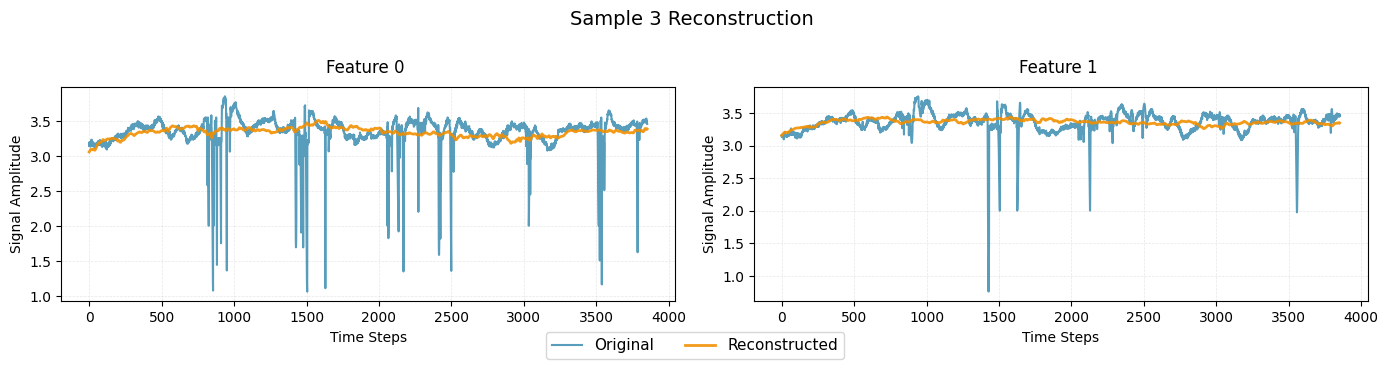

In [32]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff512_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.097349


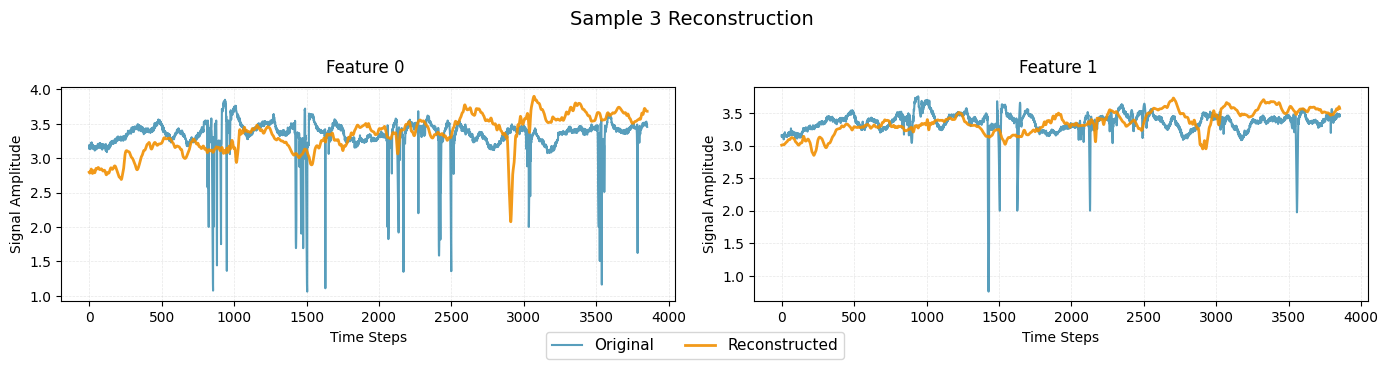

In [33]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff512_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.064345


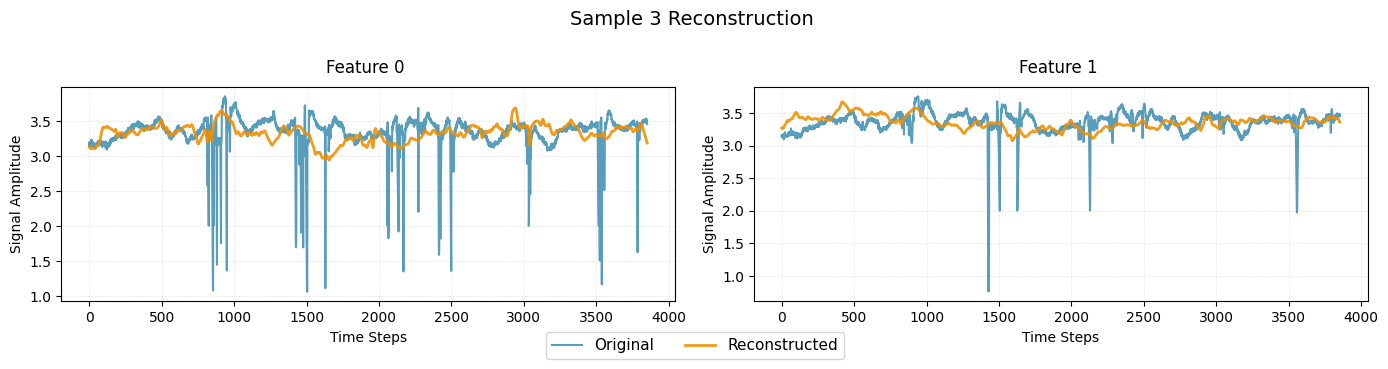

In [34]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff512_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 4.4 1024

Sample 3 Reconstruction MSE: 0.052856


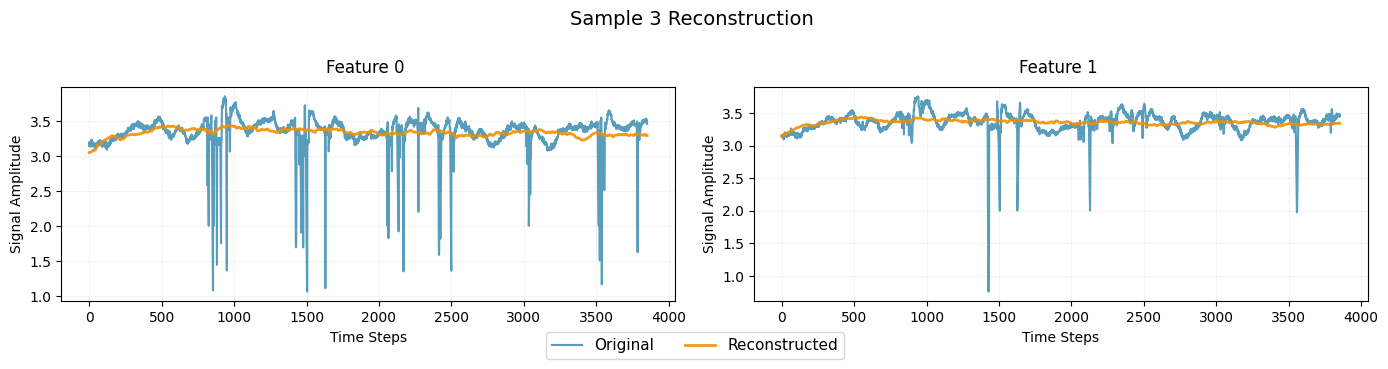

In [35]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff1024_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.056893


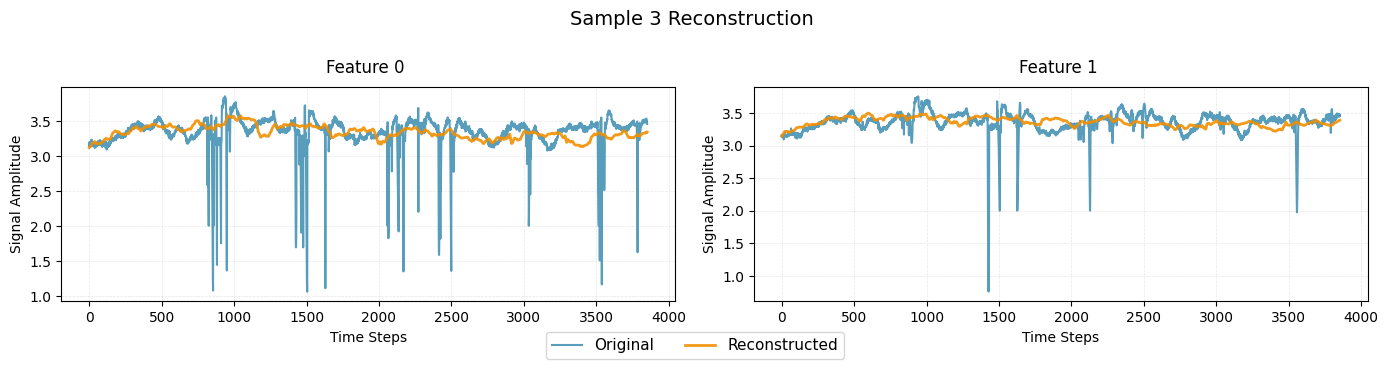

In [36]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff1024_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.060894


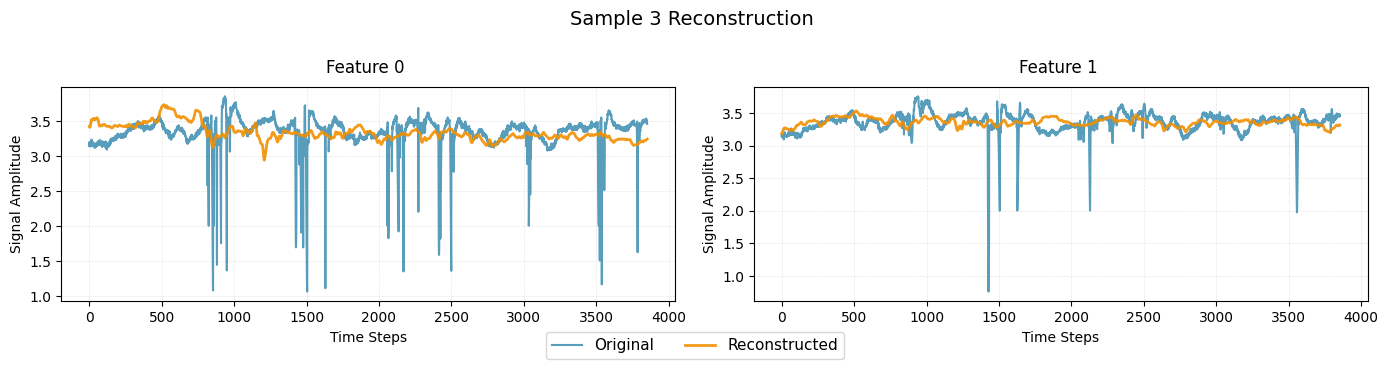

In [37]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_coeff1024_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

## 5. Architecture

In [5]:
dload = '../model_dir/ablations/architecture/'

### 5.1 MLP

Detected architecture: MLP
Sample 3 Reconstruction MSE: 0.053034


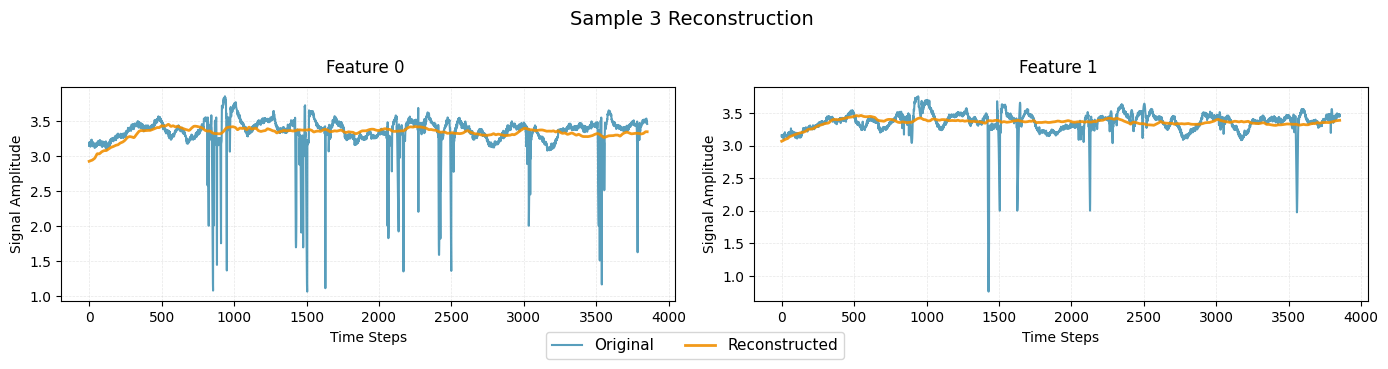

In [6]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_mlp_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Detected architecture: MLP
Sample 3 Reconstruction MSE: 0.086654


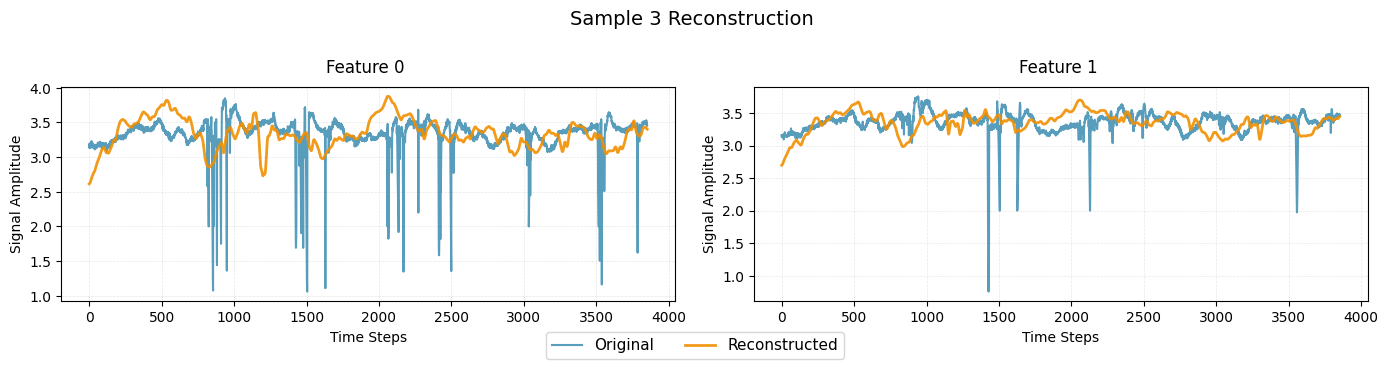

In [7]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_mlp_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Detected architecture: MLP
Sample 3 Reconstruction MSE: 0.084874


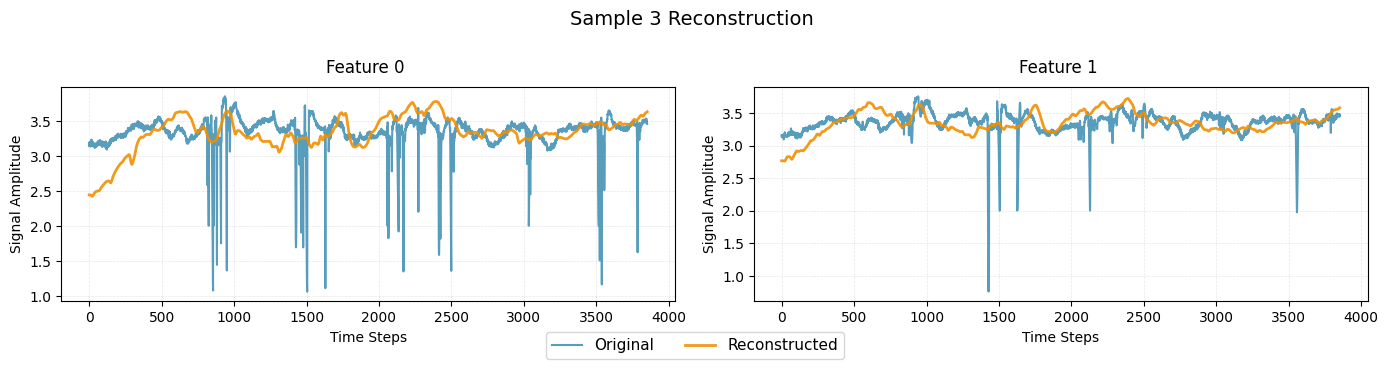

In [8]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_mlp_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 5.2 LSTM

Detected architecture: LSTM
Sample 3 Reconstruction MSE: 0.053864


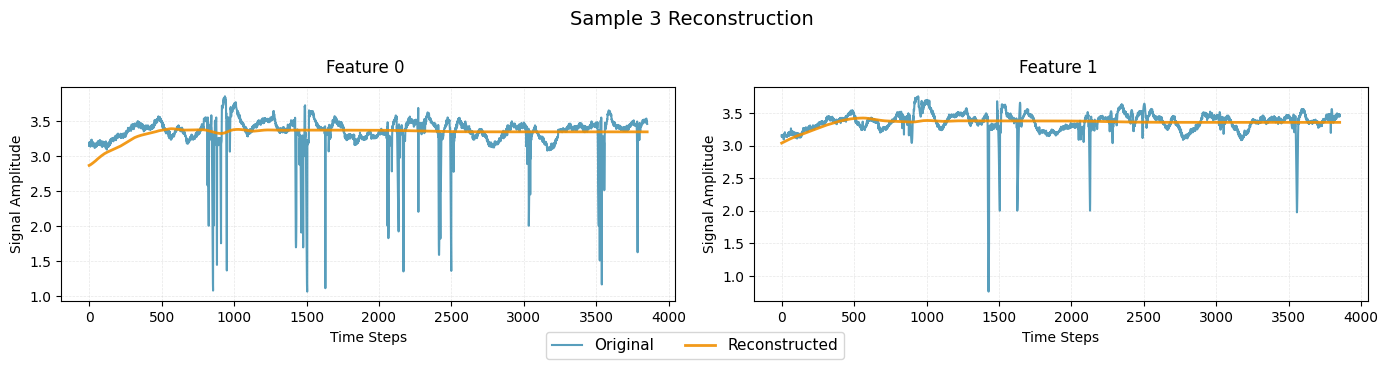

In [9]:
# None
vae = load_and_visualize_model(
    model_filename="dwt_avaer_lstm_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Detected architecture: LSTM
Sample 3 Reconstruction MSE: 0.054945


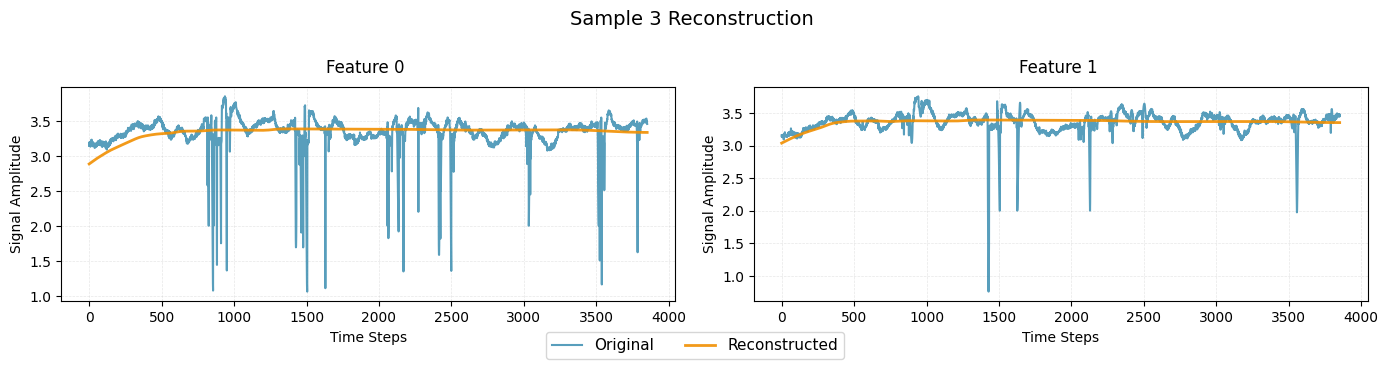

In [10]:
# Monotonic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_lstm_monotonic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Detected architecture: LSTM
Sample 3 Reconstruction MSE: 0.054878


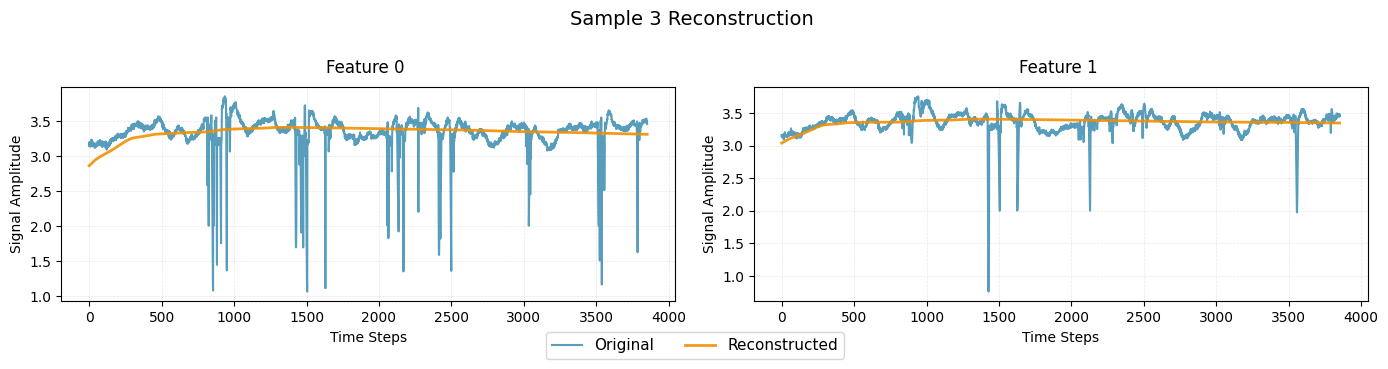

In [11]:
# Cylic
vae = load_and_visualize_model(
    model_filename="dwt_avaer_lstm_cyclic.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)